<a href="https://colab.research.google.com/github/casselnoel/stc510/blob/main/Module6Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import os
import re
import urllib.request as urllib

In [2]:
import networkx as nx

In [66]:
from io import BytesIO
from zipfile import ZipFile

In [67]:
url = 'http://www-personal.umich.edu/~mejn/netdata/dolphins.zip' #dolphin connectivity within a social group

In [69]:
with  urllib.urlopen(url) as stream:
  with ZipFile(BytesIO(stream.read())) as archive:
    archive.printdir() #looked at what files were in the zipfile

File Name                                             Modified             Size
dolphins.gml                                   2006-07-26 15:04:20         9518
dolphins.txt                                   2006-07-27 11:40:54          781


In [71]:
  with  urllib.urlopen(url) as stream:
    with ZipFile(BytesIO(stream.read())) as archive: #extracted files as strings
      txt = archive.read('dolphins.txt').decode()
      gml = archive.read('dolphins.gml').decode()

In [72]:
print(txt) #the data I choose to use as Marine Biology is my field

The file dolphins.gml contains an undirected social network of frequent
associations between 62 dolphins in a community living off Doubtful Sound,
New Zealand, as compiled by Lusseau et al. (2003).  Please cite

  D. Lusseau, K. Schneider, O. J. Boisseau, P. Haase, E. Slooten, and
  S. M. Dawson, The bottlenose dolphin community of Doubtful Sound features
  a large proportion of long-lasting associations, Behavioral Ecology and
  Sociobiology 54, 396-405 (2003).

Additional information on the network can be found in

  D. Lusseau, The emergent properties of a dolphin social network,
  Proc. R. Soc. London B (suppl.) 270, S186-S188 (2003).

  D. Lusseau, Evidence for social role in a dolphin social network,
  Preprint q-bio/0607048 (http://arxiv.org/abs/q-bio.PE/0607048)



In [73]:
print(gml) #list of nodes and edges with individuals ids

Creator "Mark Newman on Wed Jul 26 15:04:20 2006"
graph
[
  directed 0
  node
  [
    id 0
    label "Beak"
  ]
  node
  [
    id 1
    label "Beescratch"
  ]
  node
  [
    id 2
    label "Bumper"
  ]
  node
  [
    id 3
    label "CCL"
  ]
  node
  [
    id 4
    label "Cross"
  ]
  node
  [
    id 5
    label "DN16"
  ]
  node
  [
    id 6
    label "DN21"
  ]
  node
  [
    id 7
    label "DN63"
  ]
  node
  [
    id 8
    label "Double"
  ]
  node
  [
    id 9
    label "Feather"
  ]
  node
  [
    id 10
    label "Fish"
  ]
  node
  [
    id 11
    label "Five"
  ]
  node
  [
    id 12
    label "Fork"
  ]
  node
  [
    id 13
    label "Gallatin"
  ]
  node
  [
    id 14
    label "Grin"
  ]
  node
  [
    id 15
    label "Haecksel"
  ]
  node
  [
    id 16
    label "Hook"
  ]
  node
  [
    id 17
    label "Jet"
  ]
  node
  [
    id 18
    label "Jonah"
  ]
  node
  [
    id 19
    label "Knit"
  ]
  node
  [
    id 20
    label "Kringel"
  ]
  node
  [
    id 21
    label "M

In [74]:
G = nx.parse_gml(gml)

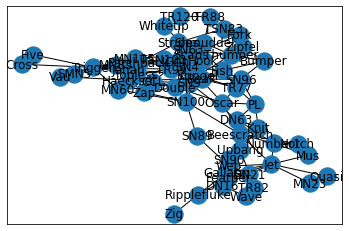

In [75]:
nx.draw_networkx(G) #graph is messy and difficult to see connections, made more easily understandable below

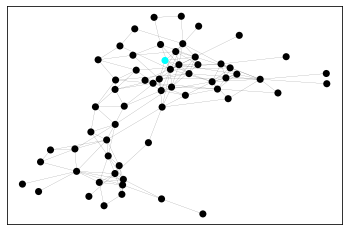

In [87]:
colors = ['black' for n in G]
colors[16] = 'cyan' #id 'Hook'
options = {
    'node_color': colors,
    'node_size': 50,
    'linewidths': 0,
    'width': 0.1,
    'with_labels': False
}
nx.draw_networkx(G, **options)

In [83]:
print(nx.info(G)) #average degree of relatedness

Name: 
Type: Graph
Number of nodes: 62
Number of edges: 159
Average degree:   5.1290


In [85]:
nx.average_clustering(G) #the degree to which take any node and look at all of nodes linked to, on average how many of those nodes linked to each other


0.2589582460550202

In [86]:
nx.degree_centrality(G) #how many links as a proportion of how many you could have (if totally connected = 1 or 100%) 'Hook' is not very connected but want to see the effect of removing Hook from the population, could have used these numbers to remove the most connected individual however Hook lost the popular vote of which dolphin got voted out of the group so it wasn't really up to me. Something about being friends with a Crocodile.

{'Beak': 0.09836065573770492,
 'Beescratch': 0.13114754098360656,
 'Bumper': 0.06557377049180328,
 'CCL': 0.04918032786885246,
 'Cross': 0.01639344262295082,
 'DN16': 0.06557377049180328,
 'DN21': 0.09836065573770492,
 'DN63': 0.0819672131147541,
 'Double': 0.09836065573770492,
 'Feather': 0.11475409836065574,
 'Fish': 0.0819672131147541,
 'Five': 0.01639344262295082,
 'Fork': 0.01639344262295082,
 'Gallatin': 0.13114754098360656,
 'Grin': 0.19672131147540983,
 'Haecksel': 0.11475409836065574,
 'Hook': 0.09836065573770492,
 'Jet': 0.14754098360655737,
 'Jonah': 0.11475409836065574,
 'Knit': 0.06557377049180328,
 'Kringel': 0.14754098360655737,
 'MN105': 0.09836065573770492,
 'MN23': 0.01639344262295082,
 'MN60': 0.04918032786885246,
 'MN83': 0.09836065573770492,
 'Mus': 0.04918032786885246,
 'Notch': 0.04918032786885246,
 'Number1': 0.0819672131147541,
 'Oscar': 0.0819672131147541,
 'PL': 0.0819672131147541,
 'Patchback': 0.14754098360655737,
 'Quasi': 0.01639344262295082,
 'Ripplefluk

In [88]:
list(G.nodes) #list of all ids

['Beak',
 'Beescratch',
 'Bumper',
 'CCL',
 'Cross',
 'DN16',
 'DN21',
 'DN63',
 'Double',
 'Feather',
 'Fish',
 'Five',
 'Fork',
 'Gallatin',
 'Grin',
 'Haecksel',
 'Hook',
 'Jet',
 'Jonah',
 'Knit',
 'Kringel',
 'MN105',
 'MN23',
 'MN60',
 'MN83',
 'Mus',
 'Notch',
 'Number1',
 'Oscar',
 'Patchback',
 'PL',
 'Quasi',
 'Ripplefluke',
 'Scabs',
 'Shmuddel',
 'SMN5',
 'SN100',
 'SN4',
 'SN63',
 'SN89',
 'SN9',
 'SN90',
 'SN96',
 'Stripes',
 'Thumper',
 'Topless',
 'TR120',
 'TR77',
 'TR82',
 'TR88',
 'TR99',
 'Trigger',
 'TSN103',
 'TSN83',
 'Upbang',
 'Vau',
 'Wave',
 'Web',
 'Whitetip',
 'Zap',
 'Zig',
 'Zipfel']

In [94]:
G.remove_node('Hook') #already removed

NetworkXError: ignored

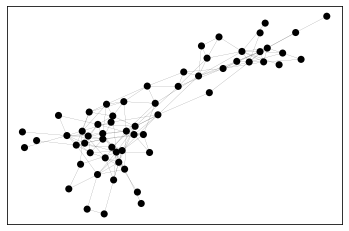

In [96]:
colors = ['black' for n in G] #new network map minus 'Hook', RIP
options = {
    'node_color': colors,
    'node_size': 50,
    'linewidths': 0,
    'width': 0.1,
    'with_labels': False
}
nx.draw_networkx(G, **options)

In [97]:
list(G.nodes) #Hook is now gone from the group

['Beak',
 'Beescratch',
 'Bumper',
 'CCL',
 'Cross',
 'DN16',
 'DN21',
 'DN63',
 'Double',
 'Feather',
 'Fish',
 'Five',
 'Fork',
 'Gallatin',
 'Grin',
 'Haecksel',
 'Jet',
 'Jonah',
 'Knit',
 'Kringel',
 'MN105',
 'MN23',
 'MN60',
 'MN83',
 'Mus',
 'Notch',
 'Number1',
 'Oscar',
 'Patchback',
 'PL',
 'Quasi',
 'Ripplefluke',
 'Scabs',
 'Shmuddel',
 'SMN5',
 'SN100',
 'SN4',
 'SN63',
 'SN89',
 'SN9',
 'SN90',
 'SN96',
 'Stripes',
 'Thumper',
 'Topless',
 'TR120',
 'TR77',
 'TR82',
 'TR88',
 'TR99',
 'Trigger',
 'TSN103',
 'TSN83',
 'Upbang',
 'Vau',
 'Wave',
 'Web',
 'Whitetip',
 'Zap',
 'Zig',
 'Zipfel']

In [98]:
nx.average_clustering(G) #average_clustering w/ Hook was 0.2589582460550202

0.24967828164549474

In [99]:
print(nx.info(G)) #average degree w/ Hook was 5.1290

Name: 
Type: Graph
Number of nodes: 61
Number of edges: 153
Average degree:   5.0164


In [100]:
nx.degree_centrality(G)

{'Beak': 0.1,
 'Beescratch': 0.13333333333333333,
 'Bumper': 0.06666666666666667,
 'CCL': 0.05,
 'Cross': 0.016666666666666666,
 'DN16': 0.06666666666666667,
 'DN21': 0.1,
 'DN63': 0.08333333333333333,
 'Double': 0.1,
 'Feather': 0.11666666666666667,
 'Fish': 0.08333333333333333,
 'Five': 0.016666666666666666,
 'Fork': 0.016666666666666666,
 'Gallatin': 0.13333333333333333,
 'Grin': 0.18333333333333332,
 'Haecksel': 0.11666666666666667,
 'Jet': 0.15,
 'Jonah': 0.11666666666666667,
 'Knit': 0.06666666666666667,
 'Kringel': 0.13333333333333333,
 'MN105': 0.1,
 'MN23': 0.016666666666666666,
 'MN60': 0.05,
 'MN83': 0.1,
 'Mus': 0.05,
 'Notch': 0.05,
 'Number1': 0.08333333333333333,
 'Oscar': 0.08333333333333333,
 'PL': 0.08333333333333333,
 'Patchback': 0.15,
 'Quasi': 0.016666666666666666,
 'Ripplefluke': 0.05,
 'SMN5': 0.016666666666666666,
 'SN100': 0.11666666666666667,
 'SN4': 0.16666666666666666,
 'SN63': 0.11666666666666667,
 'SN89': 0.03333333333333333,
 'SN9': 0.13333333333333333,


Looking at the data and visualizations, although dolphin 'Hook' was not the most connected, the removal of said individual from the population still had an overall impact on the rest of the group.